In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## missing values

LotFrontage: has missing value0.1774%
Alley: has missing value0.9377%
MasVnrType: has missing value0.0055%
MasVnrArea: has missing value0.0055%
BsmtQual: has missing value0.0253%
BsmtCond: has missing value0.0253%
BsmtExposure: has missing value0.026%
BsmtFinType1: has missing value0.0253%
BsmtFinType2: has missing value0.026%
FireplaceQu: has missing value0.4726%
GarageType: has missing value0.0555%
GarageYrBlt: has missing value0.0555%
GarageFinish: has missing value0.0555%
GarageQual: has missing value0.0555%
GarageCond: has missing value0.0555%
PoolQC: has missing value0.9952%
Fence: has missing value0.8075%
MiscFeature: has missing value0.963%


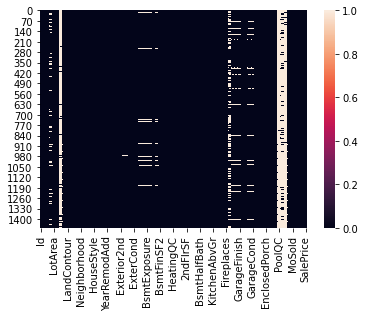

In [3]:
# plt.figure(10,9)
sns.heatmap(df.isna())
feature_has_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]

#to get how many percentage each feature has
for feature in feature_has_na:
    percentage=str(np.round(df[feature].isnull().mean(),4))
    print(str(feature)+ ": has missing value"+ percentage+"%")

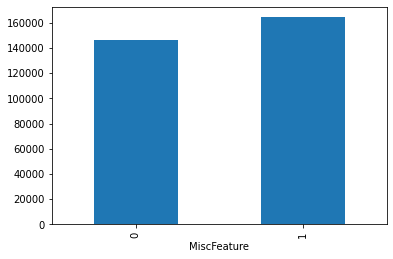

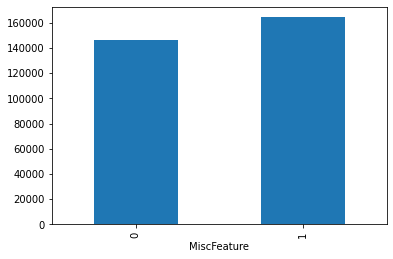

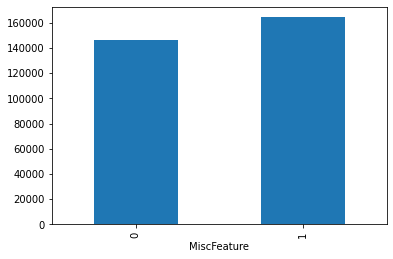

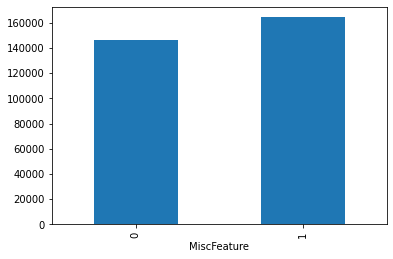

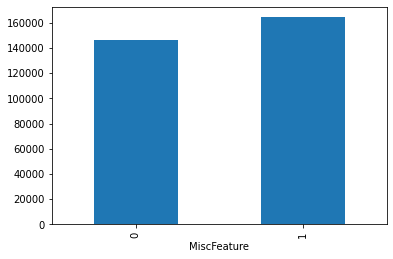

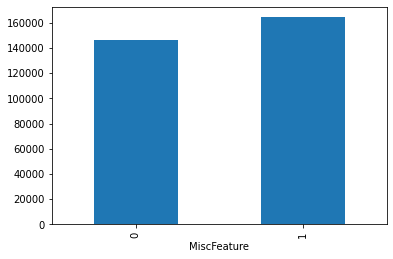

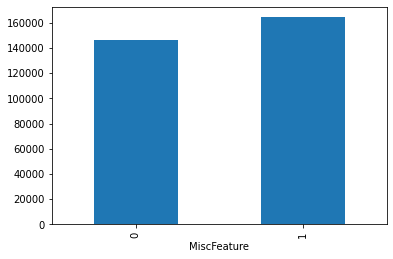

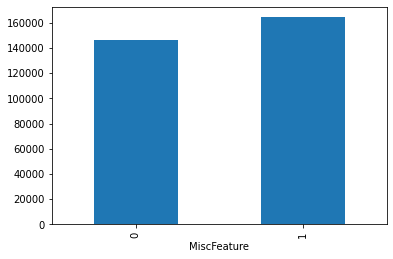

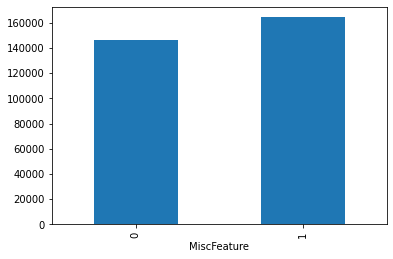

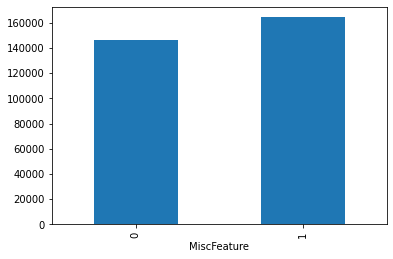

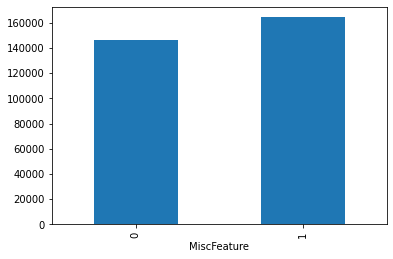

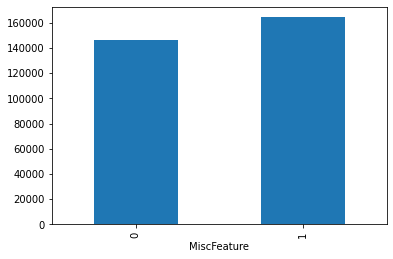

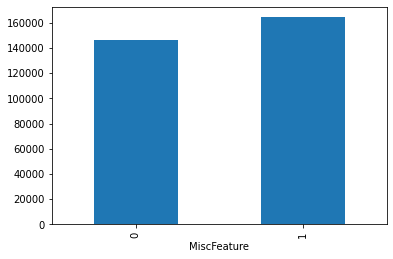

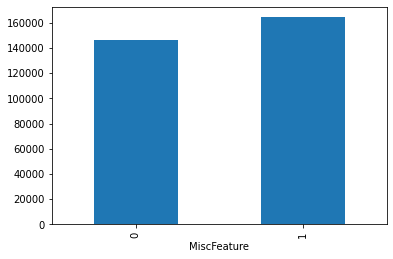

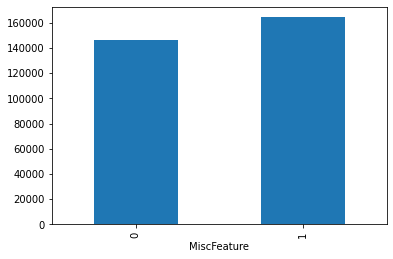

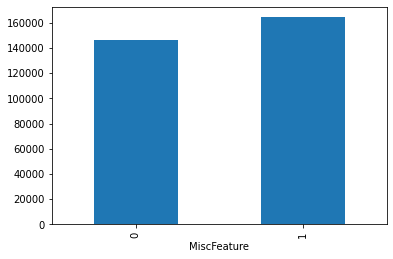

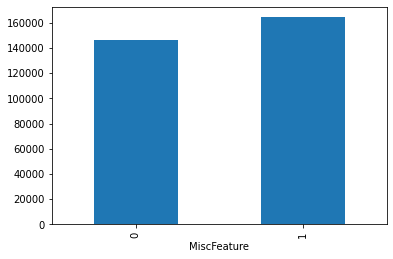

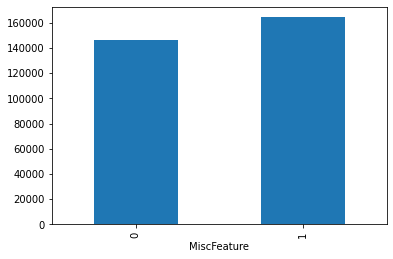

In [9]:

for na_feature in feature_has_na:
    data=df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.show()

In [17]:

    len(df["MiscFeature"].unique())

5

## EDA

In [10]:
category_feature=[feature for feature in df.columns if df[feature].dtypes=="O"]
len(category_feature)

43

In [26]:
discret_feature=[   feature for feature in df.columns 
                    if feature not in category_feature 
                    and len(df[feature].unique())<10
                ]

In [30]:
numnerical_feature=[ feature for feature in df.columns 
                     if feature not in category_feature 
                     and feature not in discret_feature 
                     and feature not in ["Id","SalePrice"]
                     and feature not in year_feature
                   ]

In [28]:
year_feature=[feature for feature in df.columns if "Year" in feature or "Yr" in feature]

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold']

### Analyse year data

In [32]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

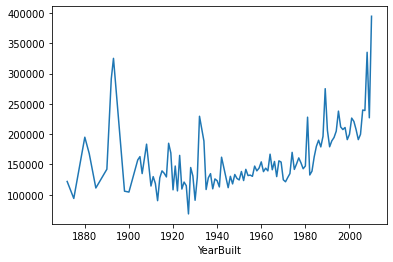

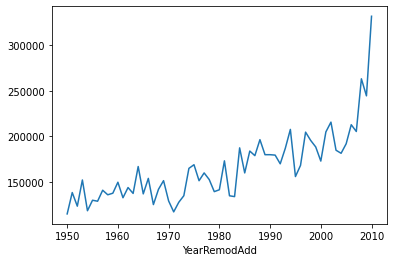

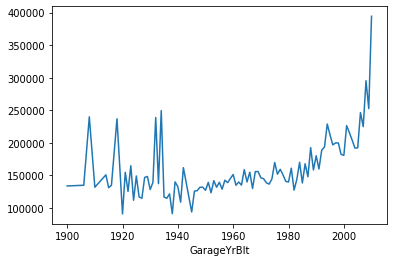

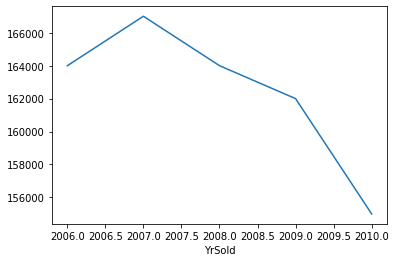

In [33]:
for feature in year_feature:
    data=df.copy()
    data.groupby(feature)["SalePrice"].median().plot()
    plt.show()
    

we can see for years sold increase the price of the house will be decrease

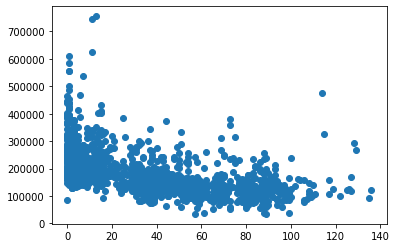

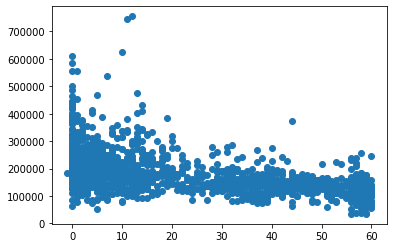

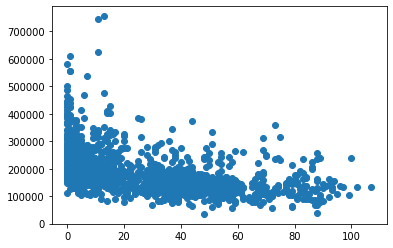

In [35]:
for feature in year_feature:
    
    if feature!="YrSold":
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.show()

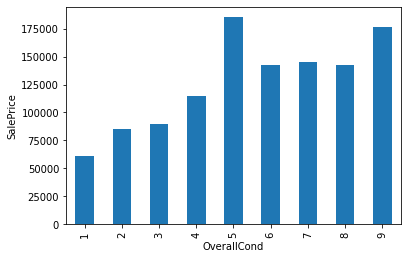

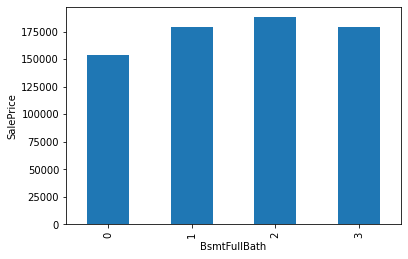

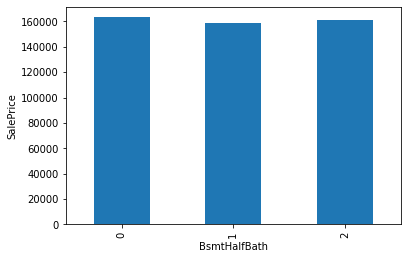

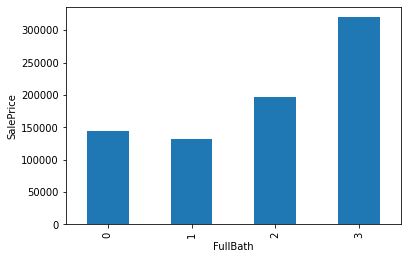

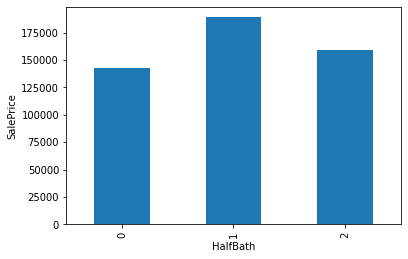

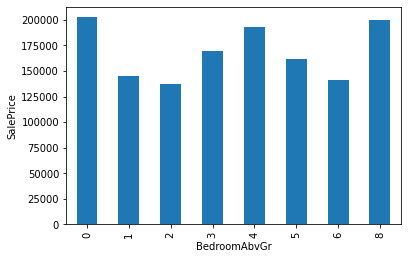

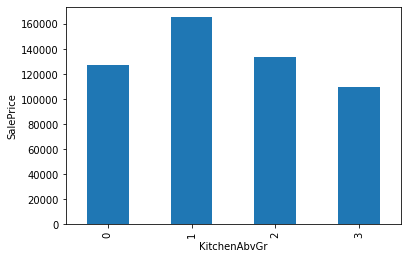

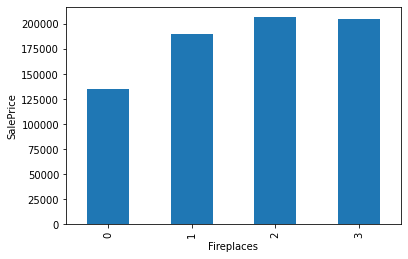

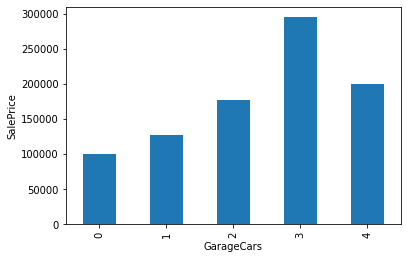

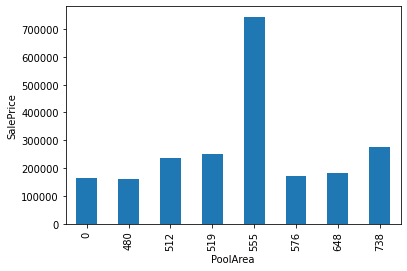

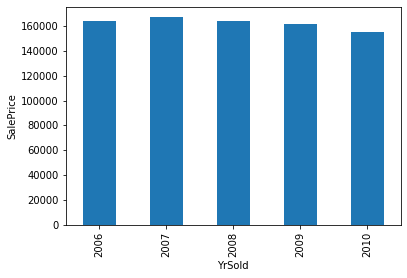

In [39]:
for feature in discret_feature:
    data=df.copy()
    
    data.groupby(feature)["SalePrice"].median().plot.bar()
    
    plt.ylabel("SalePrice")
    plt.xlabel(feature)
    plt.show()

In [40]:
# discret_feature

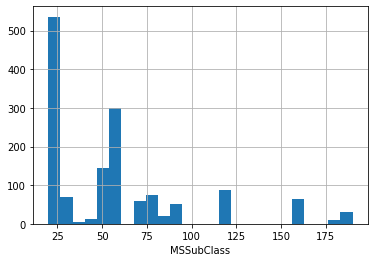

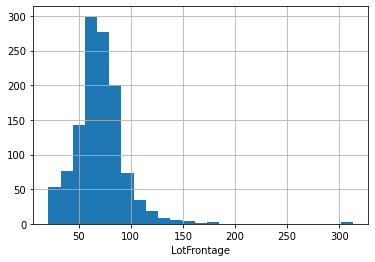

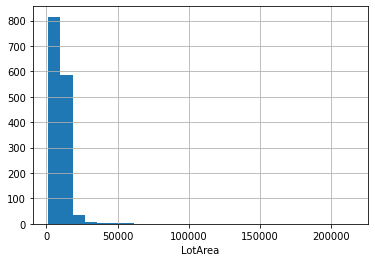

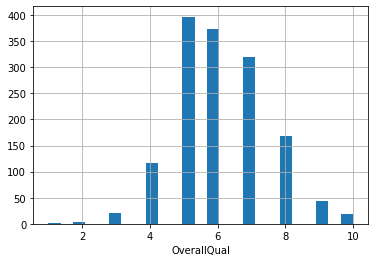

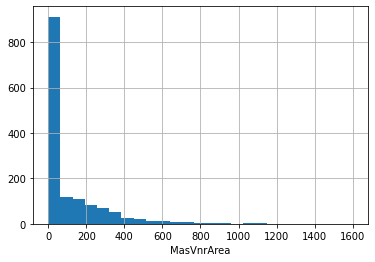

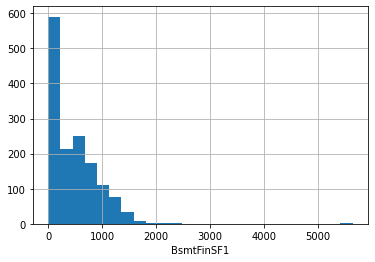

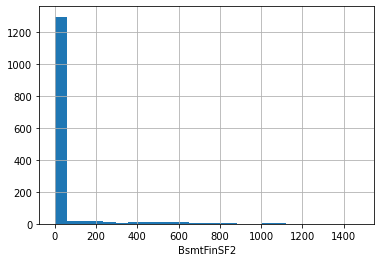

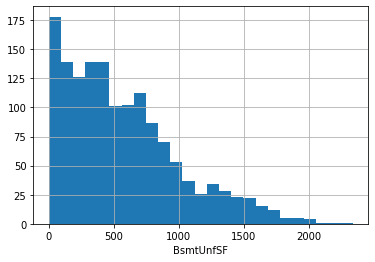

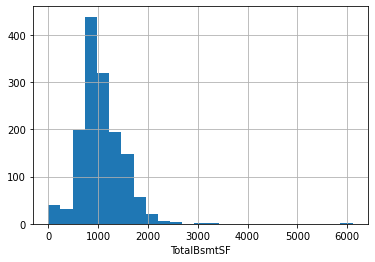

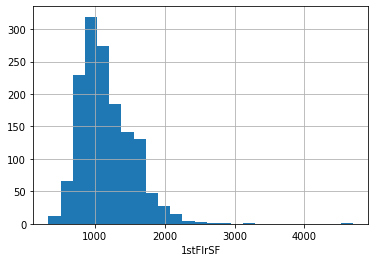

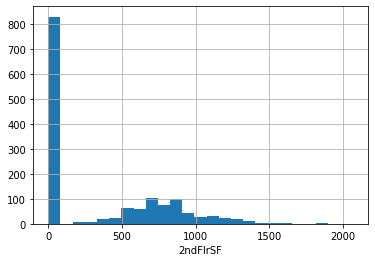

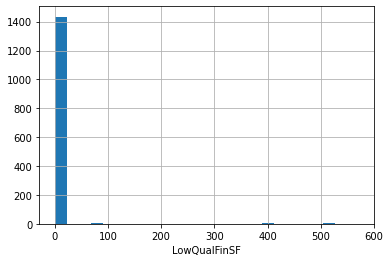

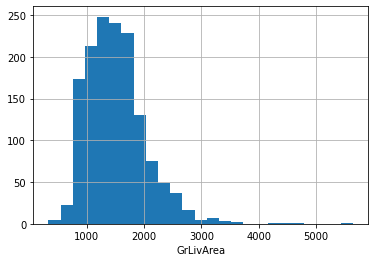

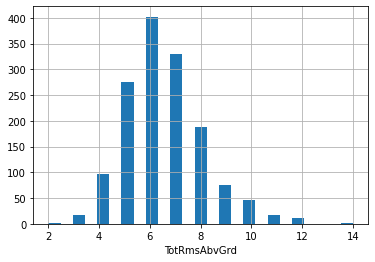

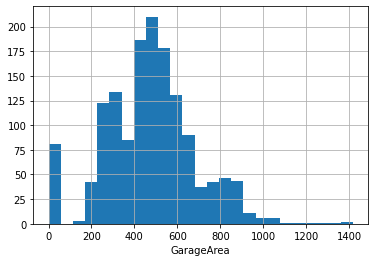

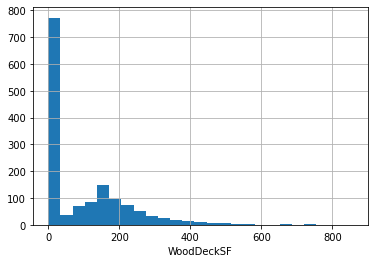

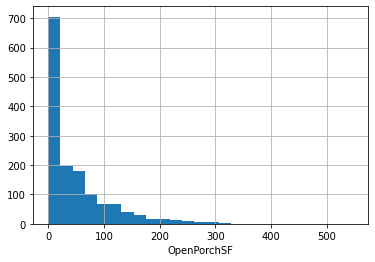

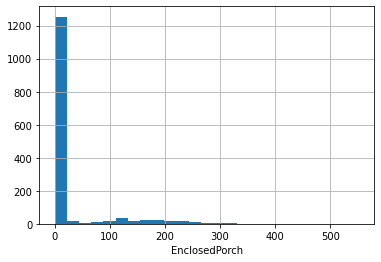

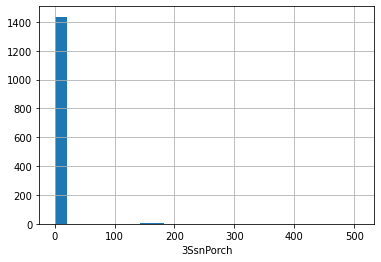

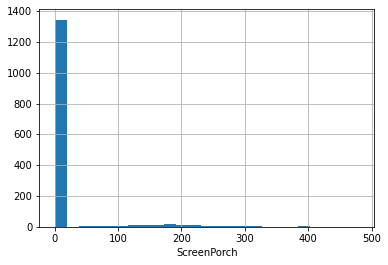

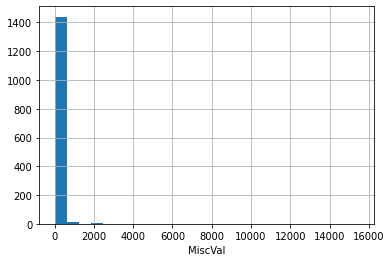

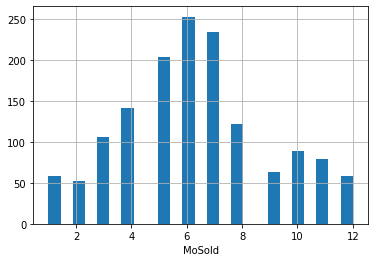

In [42]:
for feature in numnerical_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    
    plt.xlabel(feature)
    plt.show()